# Problema 7.10

<style type="text/css">
    ol { list-style-type: lower-alpha; }
</style>

Considerar una lazo cerrado con las funciones de transferencia siguientes:

$$\begin{align}
    G_c &= 5\\
    G_f &= 1\\
    G_p &= \frac{2}{(s+1)(3s+1)}\\
    G_d &= \frac{1}{(s+1)(3s+1)}\\
    G_m &= 1
\end{align}$$

Para un cambio en el _set point_ de magnitud 2, contestar a las siguientes preguntas:

1. Derivar una expresión en el dominio de Laplace para la respuesta de lazo cerrado.

2. Obtener la respuesta del lazo cerrado en tiempo real.

3. Calcular el valor máximo de $y(t)$ y establecer cuando ocurre.

4. Calcular el _offset_.

5. Calcular el periodo de oscilación de la respuesta de lazo cerrado.

6. Dibujar cualitativamente la respuesta en tiempo real.

---

**Solución**

a) En este problema se propone el siguiente lazo de control:

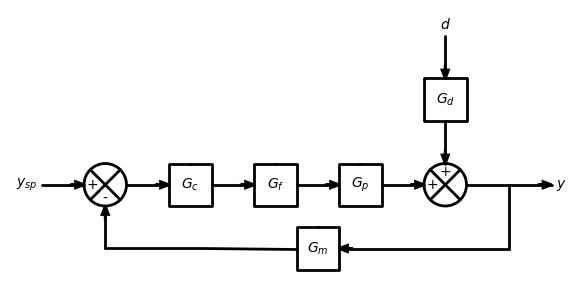

In [1]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=10)

d.add(dsp.Arrow().right().label(L"y_{sp}", "left"))
comp = d.add(dsp.Mixer(W="+", S="-").anchor("W"))
d.add(dsp.Arrow().right().at(comp.E))
control = d.add(dsp.Box(h=1, w=1).anchor("W").label(L"G_c"))
d.add(dsp.Arrow().right().at(control.E))
efc = d.add(dsp.Box(w=1, h=1).anchor("W").label(L"G_f"))
d.add(dsp.Arrow().right().at(efc.E))
proc = d.add(dsp.Box(h=1, w=1).anchor("W").label(L"G_p"))
d.add(dsp.Arrow().right().at(proc.E))
suma = d.add(dsp.Mixer(W="+", N="+").anchor("W"))
d.push()
d.add(dsp.Arrow().up().reverse().at(suma.N))
pert = d.add(dsp.Box(h=1, w=1).anchor("S").label(L"G_d"))
d.add(dsp.Arrow().up().reverse().at(pert.N).label(L"d", "right"))
d.pop()
d.add(dsp.Line().right().at(suma.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().at(dot.center).label(L"y", "right"))
d.pop()
d.add(dsp.Line().down().length(1.5).at(dot.center))
d.add(dsp.Arrow().left().length(4))
sensor = d.add(dsp.Box(h=1, w=1).anchor("E").label(L"G_m"))
d.add(dsp.Line().at(sensor.W).tox(comp.S).left())
d.add(dsp.Arrow().up().to(comp.S))

d.draw(show=false)

La respuesta de este sistema en el dominio de Laplace para un cambio en la consigna es:

$$y = \frac{G_c G_f G_p}{1 + G_c G_f G_p} y_{sp}$$

Sustituyendo se encuentra:

$$y = \frac{\frac{10}{11}}{\frac{3}{11} s^2 + \frac{4}{11} s + 1} 
   \frac{2}{s}$$

b) A partir del conocimiento de las ecuaciones de la respuesta de un proceso de segundo orden para una entrada en escalón se puede obtener la respuesta en tiempo real fácilmente. En función del coeficiente de amortiguamiento se elije una de las ecuaciones. Se puede calcular el coeficiente de amortiguamiento sabiendo:

$$\left\{\begin{array}{l}
     \tau^2 = \frac{3}{11}\\
     2 \tau \zeta = \frac{4}{11}
   \end{array}\right.$$
   
Resolviendo la ecuación anterior se encuentra:

$$\left\{\begin{array}{l}
     \tau = 0.5222\\
     \zeta = 0.3482
   \end{array}\right.$$
   
El coeficiente de amortiguamiento es menor que la unidad, lo que significa que se trata de un sistema subamortiguado. La respuesta será:

$$y (t) = K_p M \left[ 1 - \frac{1}{\sqrt[]{1 - \zeta^2}} e^{- \zeta
   \frac{t}{\tau}} \sin \left( \frac{1}{\sqrt[]{1 - \zeta^2}} 
   \frac{t}{\tau} + \mathrm{atan} \frac{\sqrt[]{1 - \zeta^2}}{\zeta} \right)
   \right]$$
   
donde:

-   $K_p$ es la ganancia del proceso. En este caso
    $K_p = \frac{10}{11}$.

-   *M* es la altura del escalón ($M = 2$).

Por tanto la respuesta en tiempo real es:

$$y (t) = 1.818 [1 - 1.067 \mathrm{e}^{- 0.6667 t} \sin (2.043 t + 1.215)]$$

c) Si se representa la función anterior se obtiene:

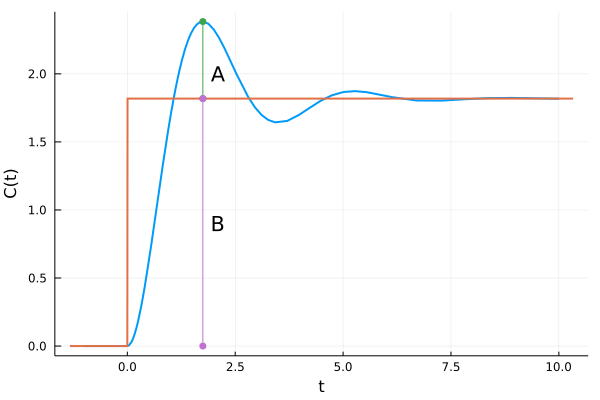

In [1]:
using Plots, SymPy, Roots, ForwardDiff

@syms t, s

# Definimos las funciones de transferencia
Gc = 5
Gf= 1
Gp = 2/((s+1)*(3s+1))
Gm = 1

# Función de transferencia del lazo de control
G = Gc*Gf*Gp/(1+Gc*Gf*Gp*Gm)

# Cambio en la consigna
Csp = 2/s

# Cálculo de y(s)
C_s = G*Csp

# Cálculo de y(t)
C = sympy.inverse_laplace_transform(C_s, s, t)

# Transformamos C(t) para que se pueda realizar la diferenciación
# automática con ForwardDiff
C_t(t) = real(lambdify(C)(t))

# Valor de C(t) cuando t tiende a infinito
B = limit(s*C_s, s, 0)

# Valor máximo de C(t), buscamos el máximo
tmax = fzero(x->ForwardDiff.derivative(C_t, x), 1)
Cmax = C_t(tmax)

plot(C, -1, 10, xlabel="t", ylabel="C(t)", legend=false, lw=2)
plot!(B*Heaviside(t), lw=2)
plot!([tmax, tmax], [B, Cmax], marker=:circle, msw=0,
    annotations=(2.1, 2, text("A")))
plot!([tmax, tmax], [0, B], marker=:circle, msw=0,
    annotations=(2.1, 0.9, text("B")))

# NOTA: El problema 7.9 resuelve un problema similar pero sin utilizar
# un método numérico para calcular la derivada.

En la gráfica se puede observar claramente que el valor máximo de la
respuesta tiene el valor de $A + B$. El valor de $B$ es el valor
estacionario que alcanza el lazo de control, es decir:

$$B = \lim_{t \to \infty} y (t) = \lim_{s \to 0} s y (s)$$

Para poder calcular el valor de $A$ sólo hay que recordar la definición de *overshoot*:

$$\mathrm{Overshoot} = \frac{A}{B}$$

Por tanto el valor máximo de $y (t)$ es:

$$y_{\max} = A + B = (\mathrm{overshoot} + 1) B$$

El *overshoot* es:

$$\mathrm{Overshoot} = \exp \left( \frac{- \pi \zeta}{\sqrt[]{1 - \zeta^2}}
   \right) = 0.3113$$
   
El valor de _B_ es:

$$B = \lim_{s \to 0} s \frac{\frac{10}{11}}{\frac{3}{11}
   s^2 + \frac{4}{11} s + 1}  \frac{2}{s} = \frac{20}{11}$$
   
Por tanto el valor máximo de la respuesta es:

$$y_{\max} = (0.3113 + 1)  \frac{10}{11} = 2.384$$

Para encontrar en que instante se produce este valor máximo de respuesta hay que resolver la siguiente ecuación:

$$y_{\max} = 2.384 = 1.818 [1 - 1.067 \mathrm{e}^{- 0.6667 t_{\max}} \sin
   (2.043 t_{\max} + 1.215)]$$
   
El resultado es: $$t_{\max} = 1.75$$

La estrategia para encontrar la posición del máximo utilizada para dibujar la gráfica anterior es diferente. En este caso de ha buscado el primer punto para el que la derivada de la respuesta es cero. No ha sido necesario calcular el _overshoot_.

d) El periodo de osiclación es:

$$T = \frac{2 \pi \tau}{\sqrt[]{1 - \zeta^2}}$$

Sustituyendo se obtiene:

$$T = 3.50$$

e) La respuesta en tiempo real está dibujada más arriba.